## 6.4 Machine Learning

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis
#### 5. Performance improvement after removing outliers
#### 6. Conclusion

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# folder path
path = r'C:\Users\jpelc\Documents\07-2023 UFC-Fight historical data'
# Importing orders.csv 
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'UFC_Subset_clean.csv'))

### 2. Data cleaning

In [4]:
df.columns

Index(['Knockdown', 'Significant_Strike_Percent', 'Takedown_Percent',
       'Submission_Attempt', 'Significant_Strikes_Landed',
       'Significant_Strikes_Attempted', 'Total_Strikes_Landed',
       'Total_Strikes_Attempted', 'Takedowns_Landed', 'Takedowns_Attempted',
       'Ground_Strikes_Landed', 'Winner'],
      dtype='object')

In [5]:
df.shape

(11516, 12)

##### Missing values

In [6]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Knockdown                        0
Significant_Strike_Percent       0
Takedown_Percent                 0
Submission_Attempt               0
Significant_Strikes_Landed       0
Significant_Strikes_Attempted    0
Total_Strikes_Landed             0
Total_Strikes_Attempted          0
Takedowns_Landed                 0
Takedowns_Attempted              0
Ground_Strikes_Landed            0
Winner                           0
dtype: int64

##### Duplicates check

In [7]:
dups = df.duplicated()

In [8]:
dups.shape # No dups

(11516,)

##### Extreme values checks

C:\Users\jpelc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Knockdown', ylabel='Density'>

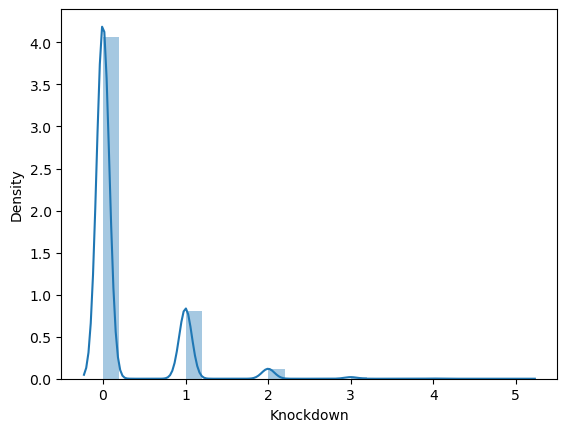

In [9]:
sns.distplot(df['Knockdown'], bins=25) # Shows extreme values

In [10]:
df['Knockdown'].mean() # Check the mean

0.21986800972559917

In [11]:
df['Knockdown'].median() # Check the median

0.0

In [12]:
df['Knockdown'].max() # Check the max

5

C:\Users\jpelc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Takedowns_Landed', ylabel='Density'>

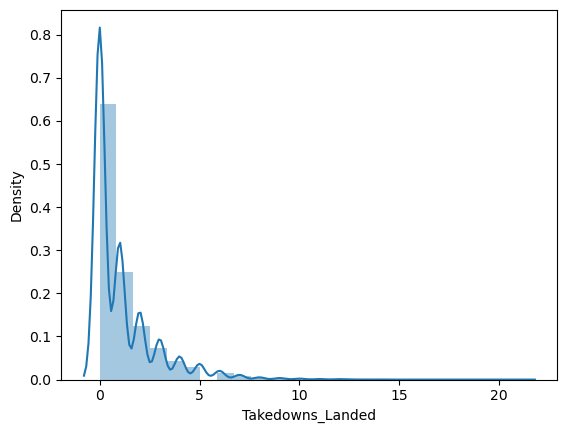

In [13]:
sns.distplot(df['Takedowns_Landed'], bins=25) # Shows extreme values

In [14]:
df['Takedowns_Landed'].mean() # Check the mean

1.0820597429663077

In [15]:
df['Takedowns_Landed'].median() # Check the median

0.0

In [16]:
df['Takedowns_Landed'].max() # Check the max

21

### 3. Data prep for regression analysis 

### Hypotheses

Exploring variables in order to see how they affect the Winner outcome.

1 - Having many knockdowns means the fighter will win the fight.

2 - Having many sucessful Takedowns means the figther will win the fight.

##### Winner vs Knockdowns

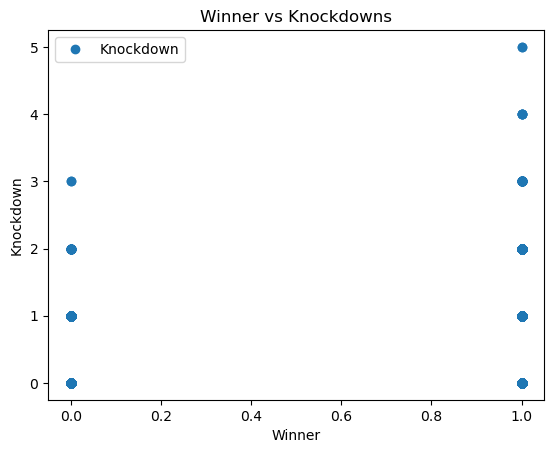

In [17]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Winner', y='Knockdown',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Winner vs Knockdowns')  
plt.xlabel('Winner')  
plt.ylabel('Knockdown')  
plt.show()

##### Winner vs Takedowns Landed

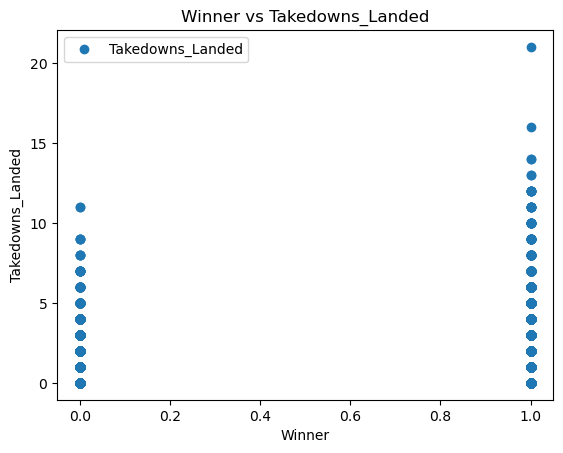

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Winner', y='Takedowns_Landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Winner vs Takedowns_Landed')  
plt.xlabel('Winner')  
plt.ylabel('Takedowns_Landed')  
plt.show()

In [19]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Winner'].values.reshape(-1,1)
y = df['Knockdown'].values.reshape(-1,1)

In [20]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_1 = df['Winner'].values.reshape(-1,1)
y_1 = df['Takedowns_Landed'].values.reshape(-1,1)

In [21]:
X

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [22]:
y

array([[2],
       [0],
       [0],
       ...,
       [0],
       [2],
       [0]], dtype=int64)

In [23]:
X_1

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [24]:
y_1

array([[0],
       [1],
       [0],
       ...,
       [2],
       [0],
       [0]], dtype=int64)

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# Split data into a training set and a test set.

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=0)

### 4. Regression analysis

In [27]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [28]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train_1, y_train_1)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

In [31]:
# Predict.

y_predicted_1 = regression.predict(X_test_1)

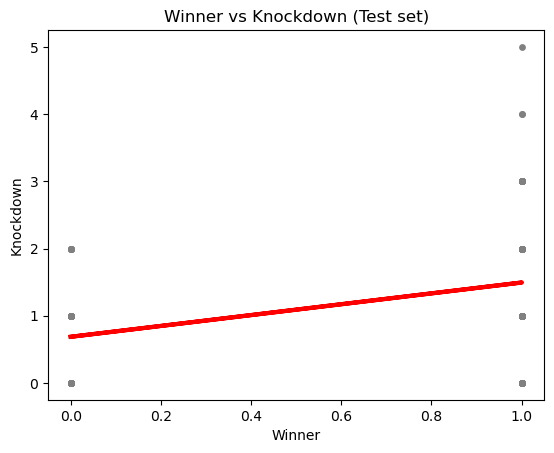

In [32]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Winner vs Knockdown (Test set)')
plot_test.xlabel('Winner')
plot_test.ylabel('Knockdown')
plot_test.show()

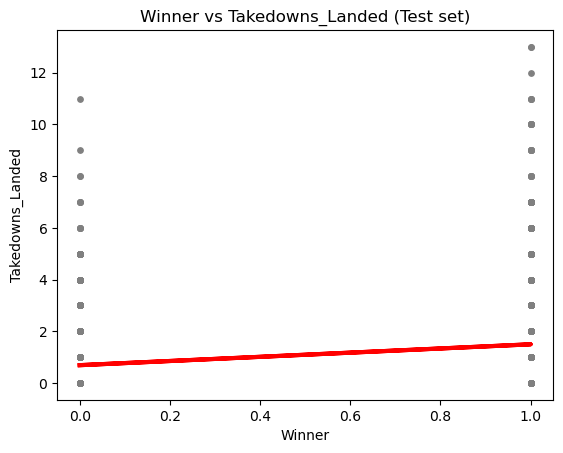

In [33]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test_1, y_test_1, color='gray', s = 15)
plot_test.plot(X_test_1, y_predicted_1, color='red', linewidth =3)
plot_test.title('Winner vs Takedowns_Landed (Test set)')
plot_test.xlabel('Winner')
plot_test.ylabel('Takedowns_Landed')
plot_test.show()

In [34]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [35]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.80766564]]
Mean squared error:  1.0336862703010021
R2 score:  -3.248376914051409


In [36]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test_1, y_predicted_1) # This is the mean squared error
r2 = r2_score(y_test_1, y_predicted_1) # This is the R2 score. 

In [37]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.80766564]]
Mean squared error:  2.7248664414288903
R2 score:  0.05878137685861373


In [38]:
y_predicted

array([[0.68653799],
       [0.68653799],
       [0.68653799],
       ...,
       [0.68653799],
       [0.68653799],
       [0.68653799]])

In [39]:
y_predicted_1

array([[0.68653799],
       [0.68653799],
       [0.68653799],
       ...,
       [0.68653799],
       [0.68653799],
       [0.68653799]])

In [40]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.686538
1,0,0.686538
2,0,0.686538
3,0,1.494204
4,0,0.686538
5,0,0.686538
6,0,0.686538
7,0,0.686538
8,0,1.494204
9,2,1.494204


In [41]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test_1.flatten(), 'Predicted': y_predicted_1.flatten()})
data.head(30)

,Actual,Predicted
0,4,0.686538
1,0,0.686538
2,2,0.686538
3,4,1.494204
4,0,0.686538
5,1,0.686538
6,0,0.686538
7,0,0.686538
8,0,1.494204
9,3,1.494204


##### Interpretations
The analysis shows a positive relationship between the independent and dependant variable. 
However for Knockdowns it has a negative r2, suggesting that the independent variable is not appropriate for explaining the variation in the dependent variable.
For Takedowns_landed the r2 is only .05, also suggesting that the model is not a good fit either.
Further analysis is required.

##### Compare how the regression fits the training set

In [42]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!
y_predicted_train_1 = regression.predict(X_train_1) # This is predicting X_train!

In [43]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [44]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.80766564]]
Mean squared error:  1.0291673707499116
R2 score:  -3.1263579565323383


In [45]:
rmse = mean_squared_error(y_train_1, y_predicted_train_1)
r2 = r2_score(y_train_1, y_predicted_train_1)

In [46]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.80766564]]
Mean squared error:  2.7243139718161555
R2 score:  0.05646749061368872


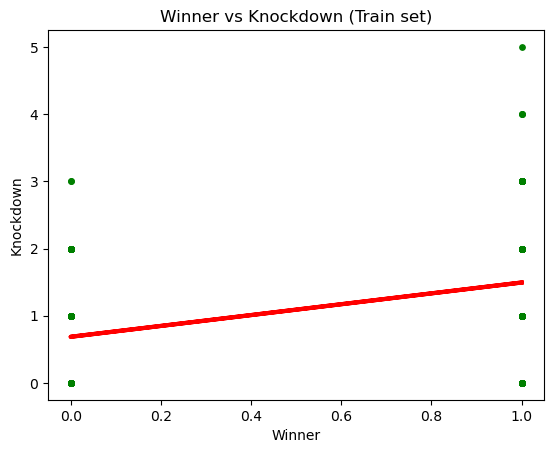

In [47]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Winner vs Knockdown (Train set)')
plot_test.xlabel('Winner')
plot_test.ylabel('Knockdown')
plot_test.show()

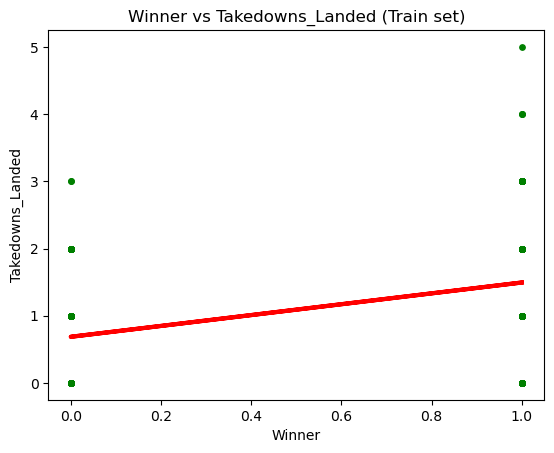

In [48]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Winner vs Takedowns_Landed (Train set)')
plot_test.xlabel('Winner')
plot_test.ylabel('Takedowns_Landed')
plot_test.show()

##### Comparing values
The train test outcome was the same. Confirming that the variables are not a good fit at predicting the outcome.

### 5. Performance improvement after removing outliers 

In [49]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Takedowns_Landed'] <=6] 

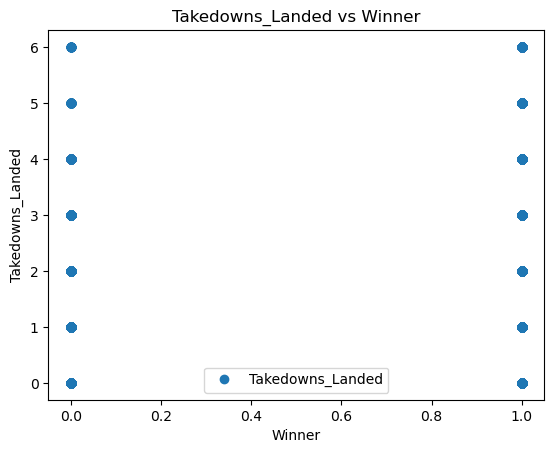

In [50]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Winner', y='Takedowns_Landed',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Takedowns_Landed vs Winner')  
plt.xlabel('Winner')  
plt.ylabel('Takedowns_Landed')  
plt.show()

In [51]:
# Reshape again.

X_2 = df_test['Winner'].values.reshape(-1,1)
y_2 = df_test['Takedowns_Landed'].values.reshape(-1,1)

In [52]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [53]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [54]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [55]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [56]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.6037647]]
Mean squared error:  1.8112936971285165
R2 score:  0.060745725266987405


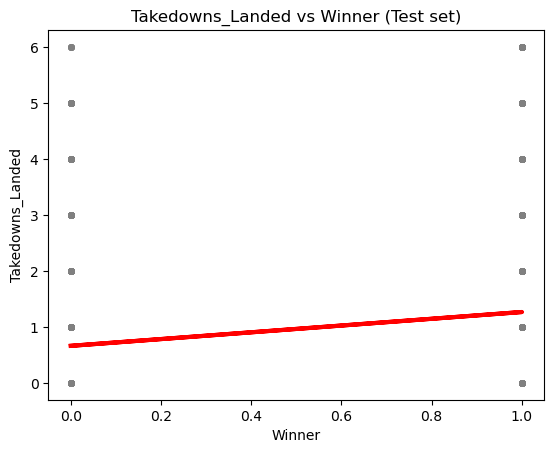

In [57]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Takedowns_Landed vs Winner (Test set)')
plot_test.xlabel('Winner')
plot_test.ylabel('Takedowns_Landed')
plot_test.show()

In [58]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.662245
1,2,0.662245
2,1,1.266010
3,0,0.662245
4,0,0.662245
5,1,0.662245
6,0,0.662245
7,1,1.266010
8,1,1.266010
9,0,0.662245


## 6. Conclusion

The regression analysis aimed to explore the relationship between the number of knockdowns or takedowns a fighter has with the outcome of the fight, specifically whether they figther won..

However, the model did not fit the data well, as evidenced by the negative R-squared value on the Knockdown variable and only a 0.5 value for Takedowns landed.
This suggests that the number of knockdowns alone is not a sufficient predictor of the fight's winner and that other factors may play a significant role in determining the fight's outcome.

This analysis highlights the complexity of predicting fight outcomes solely based on Knockdowns and underscores the importance of considering additional variables and factors that might influence the results.
Further investigation is needed to identify more relevant predictors and develop a more accurate model for predicting fight winners.